In [1]:
from torchvision.io import read_image

In [8]:
import torchvision.transforms as transforms
from PIL import Image
img_path = 'test.jpg'
#mask_path = 'Deeplab/check.jpg'
mask_path = 'cleaned_mask_with_crf.jpg'
# Function to convert PIL image to grayscale tensor cleaned_mask_with_crf.jpg
def pil_to_grayscale_tensor(image):
    grayscale_transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.ToTensor()
    ])
    return grayscale_transform(image)

# Read the image using PIL
img_pil = Image.open(img_path)

# Read the mask using PIL
mask_pil = Image.open(mask_path)

# Convert the mask to grayscale tensor
mask_gray_tensor = pil_to_grayscale_tensor(mask_pil)

from torchvision.ops import masks_to_boxes

# Now, mask tensor should have dimensions [1, 512, 512]
boxes = masks_to_boxes(mask_gray_tensor)



print(boxes)


tensor([[  0.,  16., 439., 295.]])


In [9]:
import torchvision.transforms as transforms
from PIL import Image

# Example usage
image_path = "test.jpg"

# Define the transformation
resize = transforms.Resize((512, 512))  # Specify the new height and width

# Read the image
image = Image.open(image_path)

# Apply the transformation
resized_image = resize(image)

# Display or save the resized image
resized_image.save('test.jpg') 

In [10]:
img = read_image('test.jpg')

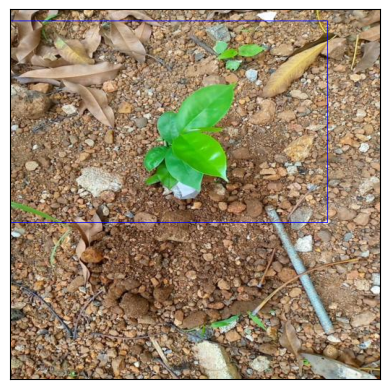

In [11]:
from torchvision.utils import draw_bounding_boxes

drawn_boxes = draw_bounding_boxes(img, boxes, colors="blue")
show(drawn_boxes)

In [14]:
import os 
os.chdir('/teamspace/studios/this_studio/sam-hq')
from segment_anything import sam_model_registry, SamPredictor

/teamspace/studios/this_studio/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_5m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/teamspace/studios/this_studio/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_11m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/teamspace/studios/this_studio/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_21m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is no

In [15]:
'''
!mkdir pretrained_checkpoint
!wget https://huggingface.co/lkeab/hq-sam/resolve/main/sam_hq_vit_l.pth
!mv sam_hq_vit_l.pth pretrained_checkpoint
'''

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


def show_res(masks, scores, input_point, input_label, input_box, image):
    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10,10))
        plt.imshow(image)
        show_mask(mask, plt.gca())
        if input_box is not None:
            box = input_box[i]
            show_box(box, plt.gca())
        if (input_point is not None) and (input_label is not None):
            show_points(input_point, input_label, plt.gca())

        print(f"Score: {score:.3f}")
        plt.axis('off')
        plt.show()


def show_res_multi(masks, scores, input_point, input_label, input_box, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    for mask in masks:
        show_mask(mask, plt.gca(), random_color=True)
    for box in input_box:
        show_box(box, plt.gca())
    for score in scores:
        print(f"Score: {score:.3f}")
    plt.axis('off')
    plt.show()


sam_checkpoint = "pretrained_checkpoint/sam_hq_vit_l.pth"
model_type = "vit_l"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

<All keys matched successfully>


In [17]:
os.chdir('/teamspace/studios/this_studio')

SAM score for this mask is: 0.90529364


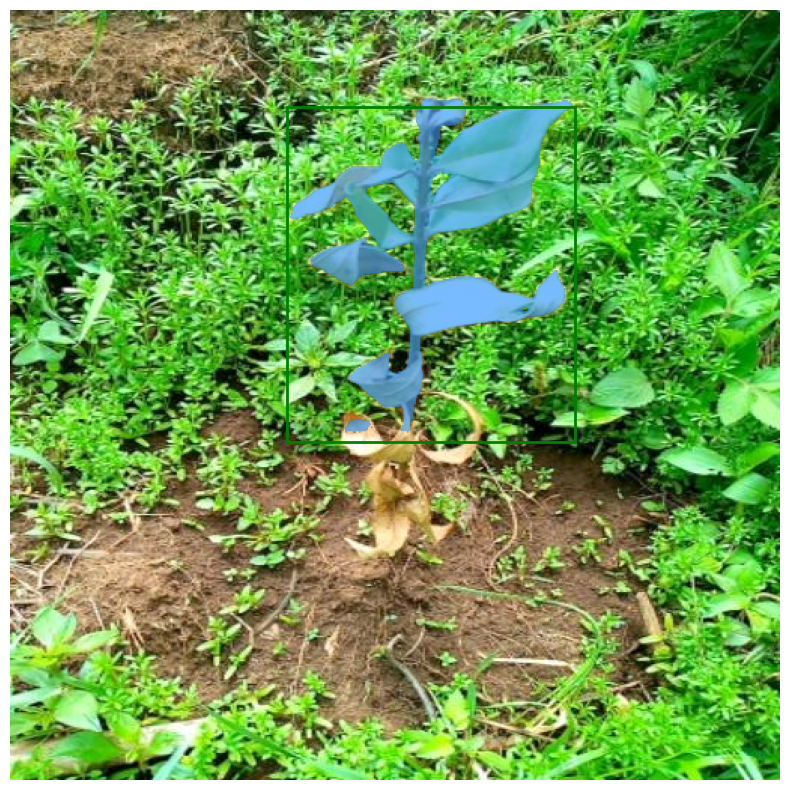

In [25]:
  import matplotlib.image as mpimg

  image = mpimg.imread(image_path)
  image = image.astype(np.uint8)

  predictor.set_image(image)

  input_box = np.array(boxes.tolist()[0])

  masks, scores, logits = predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box[None, :],
      multimask_output=False,
  )

  print("SAM score for this mask is: " + str(scores[0]))

  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  show_mask(masks[0], plt.gca())
  show_box(input_box, plt.gca())
  plt.axis('off')
  plt.show()


In [4]:
from torchvision.io import read_image

img_path = 'check.jpg'
mask_path = 'Deeplab/check_mask.jpg'
img = read_image(img_path)
mask = read_image(mask_path)

In [5]:
print(mask.size())
print(img.size())
print(mask)

torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)


In [9]:
print(mask.size())
print(mask)

torch.Size([3, 512, 512])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)


In [22]:
from torchvision.ops import masks_to_boxes
import numpy as np
boxes = masks_to_boxes(mask)
print(boxes.size())
#boxes = boxes[0].numpy()
print(boxes[0])

torch.Size([3, 4])
tensor([ 96., 272., 319., 415.])


In [6]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

ASSETS_DIRECTORY = "assets"

plt.rcParams["savefig.bbox"] = "tight"

import torchvision.transforms.functional as F
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Matplotlib created a temporary cache directory at /tmp/matplotlib-ex1tnequ because the default path (/teamspace/studios/this_studio/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


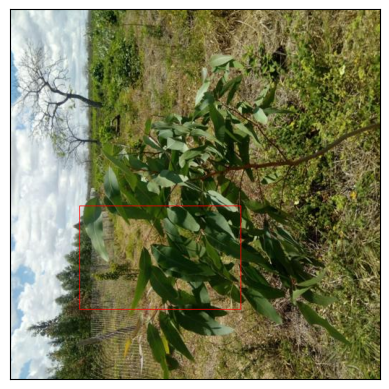

In [18]:
from torchvision.utils import draw_bounding_boxes

drawn_boxes = draw_bounding_boxes(img, boxes, colors="red")
show(drawn_boxes)

In [12]:
# We get the unique colors, as these would be the object ids.
import torch
obj_ids = torch.unique(mask)

# first id is the background, so remove it.
obj_ids = obj_ids[1:]
print(obj_ids)

# split the color-encoded mask into a set of boolean masks.
# Note that this snippet would work as well if the masks were float values instead of ints.
masks = mask == obj_ids[:, None, None]

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  27,  28,  33,
         37, 221, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
        253, 254, 255], dtype=torch.uint8)


RuntimeError: The size of tensor a (3) must match the size of tensor b (59) at non-singleton dimension 0